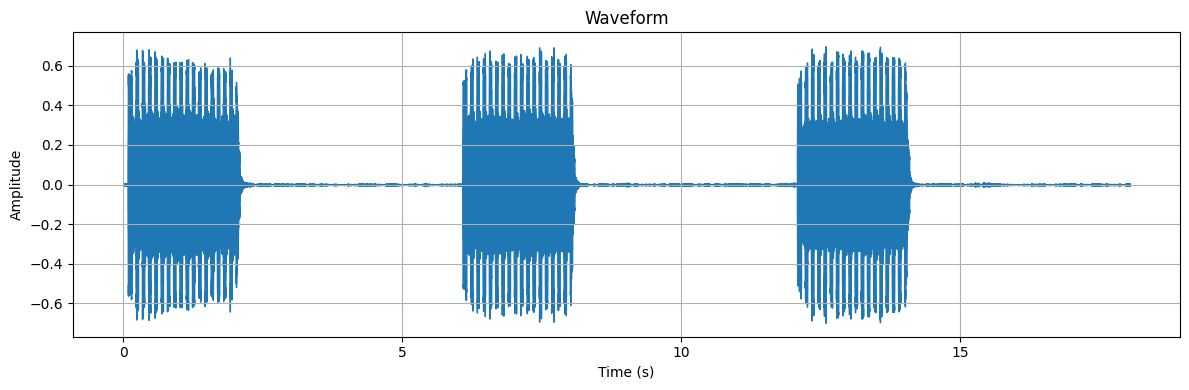

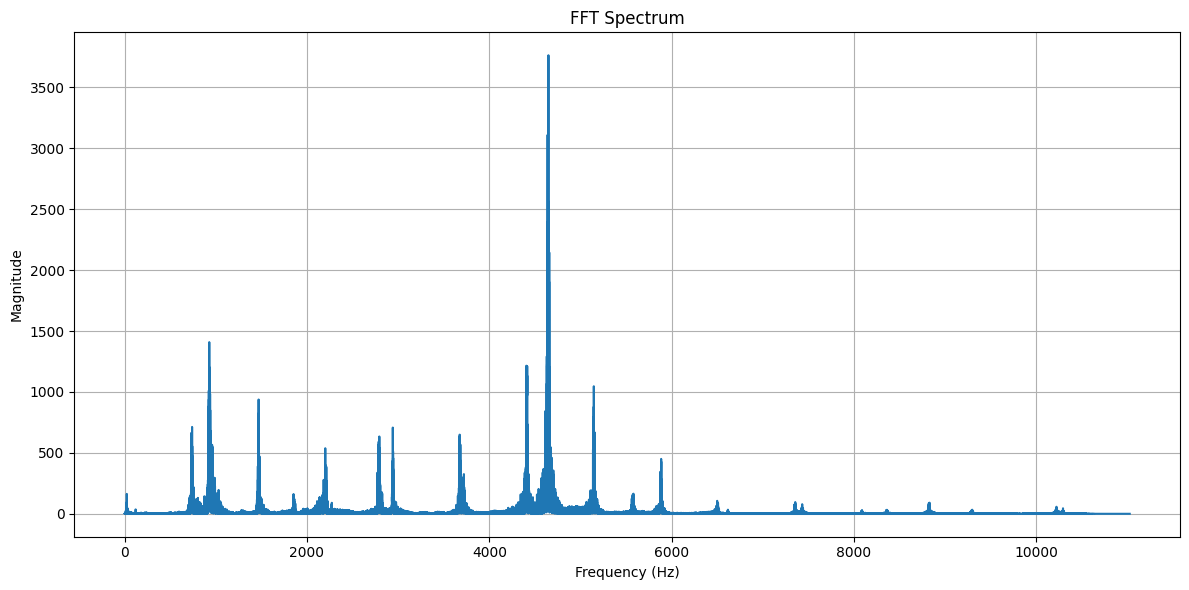

In [61]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# 1. 오디오 파일 불러오기
y, sr = librosa.load('bell.mp3')  # 예제 오디오 파일 사용

# 2. FFT 수행 (복소수 결과)
fft_result = np.fft.fft(y)

# 3. 주파수 벡터 생성
frequencies = np.fft.fftfreq(len(fft_result), 1/sr)

# 4. 복소수 결과의 절댓값(크기 스펙트럼)
magnitude = np.abs(fft_result)

# 5. 양의 주파수만 시각화 (대칭 제거)
half_length = len(magnitude) // 2
frequencies = frequencies[:half_length]
magnitude = magnitude[:half_length]

# 2. 파형 그리기
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

# 6. 시각화
plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Spectrum')
plt.grid()
plt.tight_layout()
plt.show()


In [54]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

# librosa 라이브러리 이용
def librosa_stft(filepath:str='sample.mp3'):
    waveform, sample_rate = librosa.load(filepath)

    x = waveform
    y = librosa.stft(x, n_fft=512, hop_length=128, win_length=512, window='hamming')

    magnitude = np.abs(y)
    log_spectrogram = librosa.amplitude_to_db(magnitude)

    mel_spec = librosa.feature.melspectrogram(
        y=waveform,
        sr=sample_rate,
        n_fft=1024,
        hop_length=256,
        n_mels=80,         # mel band 수
        power=2.0          # power=2: 파워 스펙트럼 (제곱된 크기), 1.0: magnitude
    )

    # 3. dB 스케일로 변환
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    return log_spectrogram, mel_db

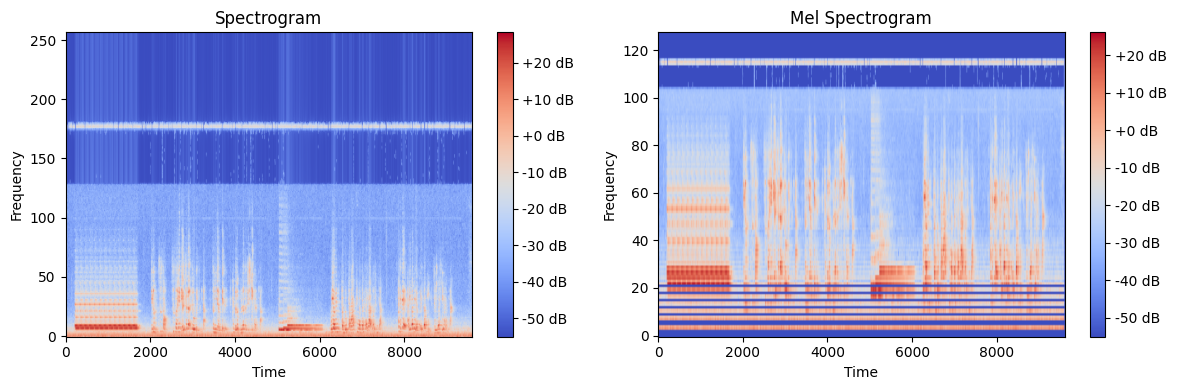

In [ ]:
import torch
import torchaudio
from torchaudio import transforms 

## torchaudio 라이브러리 이용 ##

# 입력 신호 로드
waveform, sample_rate = torchaudio.load('sample.mp3')

# STFT 파라미터 설정
window_size = 512
hop_size = 128
n_mels = 128

# STFT 변환기 생성
stft_transform = transforms.Spectrogram(n_fft=window_size, \
				hop_length=hop_size, window_fn=torch.hamming_window)

# STFT 계산
stft = stft_transform(waveform)
magnitude = stft.abs()
db_transform = transforms.AmplitudeToDB()
db_magnitude = db_transform(magnitude)

# Mel 스펙트로그램 변환기 생성
mel_spec_transform = transforms.MelSpectrogram(sample_rate=sample_rate, \
				n_fft=window_size, hop_length=hop_size, n_mels=n_mels)

# Mel 스펙트로그램 계산
mel_spec = mel_spec_transform(waveform)
mel_magnitude = mel_spec.abs()
db_mel_transform = transforms.AmplitudeToDB()
db_mel_magnitude = db_transform(mel_magnitude)

# 결과 시각화: 일반적인 STFT magnitude
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(db_magnitude[0].numpy(), aspect='auto', origin='lower', cmap='coolwarm', vmin=-55)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')

# 결과 시각화: Mel 스케일로 변환한 STFT magnitude
plt.subplot(1, 2, 2)
plt.imshow(db_mel_magnitude[0].numpy(), aspect='auto', origin='lower', cmap='coolwarm', vmin=-55)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Mel Spectrogram (dB)')

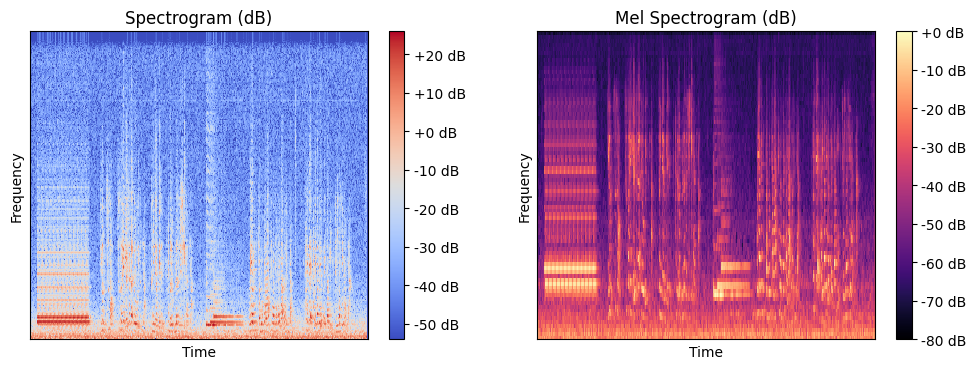

In [58]:
log_spectrogram, mel_spec = librosa_stft('sample.mp3')

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=128)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

plt.subplot(1, 2, 2)
librosa.display.specshow(mel_spec, sr=16000, hop_length=128)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (dB)")




Text(0.5, 1.0, 'Mel Spectrogram (dB)')

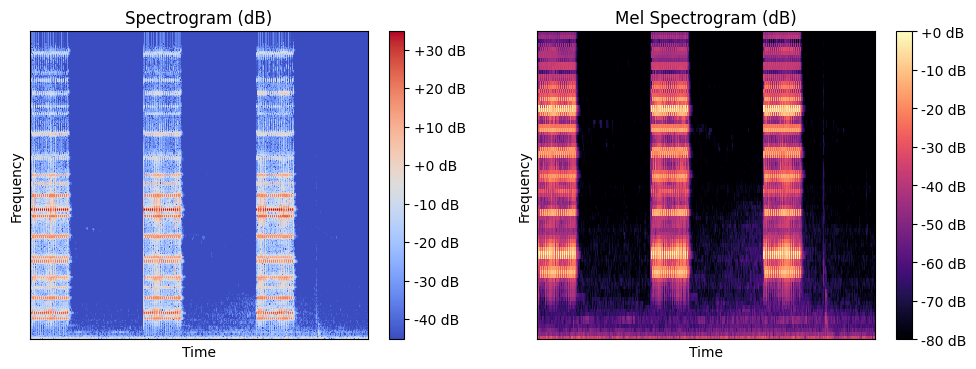

In [59]:
log_spectrogram, mel_spec = librosa_stft('bell.mp3')

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=128)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")

plt.subplot(1, 2, 2)
librosa.display.specshow(mel_spec, sr=16000, hop_length=128)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram (dB)")